In [ ]:
# Convex Optimization 
# Tutorial 11
# Feature selection and sparse linear separation

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [ ]:
# the given data in .m format has been converted into .txt file
# with neccessary changes, such as removing ';...'
# to make it easy to read the contents of the file

M = N = n = 50
Lambda = np.logspace(-2, 2, 50)
features = []
thickness = []
cardinality = []

with open("X_data.txt","r") as file:
  X = []
  for i in range(n):
    X.append(file.readline().split())
    X[i] = [float(x) for x in X[i]]
X = np.matrix(X)

with open("Y_data.txt","r") as file:
  Y = []
  for i in range(n):
    Y.append(file.readline().split())
    Y[i] = [float(y) for y in Y[i]]
Y = np.matrix(Y)

def card(A):
  value = 0
  for i in range(n):
    if np.abs(A[i]) > 0.0001:
      value += 1
    else:
      features.append(i)

  return value

A = cp.Variable((n, 1))
B = cp.Variable(1)

Constraints = []
for i in range(N):
  Constraints += [X.T[i] @ A - B >= 1]
for i in range(M):
  Constraints += [Y.T[i] @ A - B <= -1]

for j in Lambda:
  Objective = cp.Minimize(cp.norm(A, 2) + j*cp.norm(A, 1))
  prob = cp.Problem(Objective, Constraints)
  prob.solve()
  thickness.append(2 / cp.norm(A).value)
  cardinality.append(card(A.value))


Text(0, 0.5, 'Thickness of the slab')

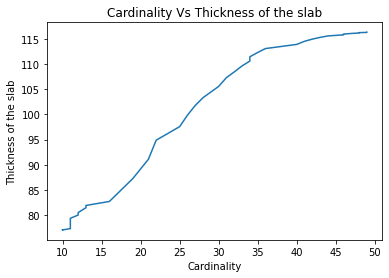

In [ ]:
plt.figure()
plt.title('Cardinality Vs Thickness of the slab')
plt.plot(cardinality, thickness)
plt.xlabel("Cardinality")
plt.ylabel("Thickness of the slab")

In [ ]:
final_features = [i for i in range(n)]
for i in set(features):
  final_features.remove(i)
print(f'Indices of the features used: {final_features}')

new_X = []
new_Y = []
for i in final_features:
  new_X.append(X[i])
  new_Y.append(Y[i])

A = cp.Variable((10, 1))
B = cp.Variable(1)
Constraints = []
for i in range(10):
  Constraints += [np.array(new_X).T[i] @ A - B >= 1]
  Constraints += [np.array(new_Y).T[i] @ A - B <= -1]

Objective = cp.Minimize(cp.norm(A, 2))
prob = cp.Problem(Objective, Constraints)
prob.solve()
print(f'The maximum thickness that separates the slab using the chosen festures is\n{2/cp.norm(A).value}\n')


Indices of the features used: [0, 6, 7, 17, 18, 20, 22, 25, 26, 45]
The maximum thickness that separates the slab using the chosen festures is
84.3938782814674

